In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set plot style
sns.set_style('whitegrid')
plt.rc('figure', figsize=(12, 6))

import warnings
warnings.filterwarnings('ignore')

In [27]:
df = pd.read_csv("data.csv")
df.head()

,Automobile,Lot Year,Lot Make,Lot Model,Drivetrain,Vehicle Body Style,Vehicle Engine,VIN,Invoice Date,Sale Price,...,Yard city,Yard State,Title Type,Title State,Lot Color,Transmission Type,Lot Link,Lot Fuel Type,LOT_SOLD_RUN,RERUN_COUNT
0,AUTOMOBILE ...,2024,NISS,VERSA S,NaN,NaN,NaN,3N1CN8DV8RL867765,05/26/2025,3800,...,SEAFORD,DE,S1,MD,GRAY,Automatic,https://www.copart.com/lot/49239315,GAS ...,3,0
1,AUTOMOBILE ...,2022,HYUN,ELANTRA N,NaN,NaN,NaN,KMHLW4AK9NU008872,05/27/2025,7400,...,COLUMBUS,OH,ST,OH,BLACK,Automatic,https://www.copart.com/lot/54318285,GAS ...,1,0
2,AUTOMOBILE ...,2025,DODG,CHARGER DA,NaN,NaN,NaN,2C3CDBCK9SR543225,05/27/2025,28500,...,CHICAGO HEIGHTS,IL,CT,MI,BLACK,Automatic,https://www.copart.com/lot/49432685,ELECTRIC ...,1,0
3,AUTOMOBILE ...,2018,FORD,FOCUS SEL,NaN,NaN,NaN,1FADP3H24JL294433,05/26/2025,600,...,GRAHAM,WA,BS,WA,WHITE,Automatic,https://www.copart.com/lot/38223554,GAS ...,2,1
4,VANS/MINIVANS ...,2013,TOYT,SIENNA LE,FWD,SPORTS VAN,3.5L 6,5TDKK3DC0DS353348,05/27/2025,2150,...,PENNSBURG,PA,SC,PA,SILVR,Automatic,https://www.copart.com/lot/57671325,GAS ...,1,0


In [28]:
columns = [
    "Lot Year",
    "Lot Make",
    "Lot Model",
    "Sale Price",
    "Lot Run Condition",
    "Sale Title Type",
    "Damage Type Description",
    "Odometer Reading",
    "Lot Fuel Type"
]

df_processing = df[columns]
df_processing.head()

,Lot Year,Lot Make,Lot Model,Sale Price,Lot Run Condition,Sale Title Type,Damage Type Description,Odometer Reading,Lot Fuel Type
0,2024,NISS,VERSA S,3800,RUN & DRIVE,CERT OF SALVAGE > 75,ALL OVER ...,12902,GAS ...
1,2022,HYUN,ELANTRA N,7400,ENGINE STARTS,CERT OF TITLE-SALVAG,FRONT END ...,34151,GAS ...
2,2025,DODG,CHARGER DA,28500,RUN & DRIVE,CERTIFICATE OF TITLE,BURN - ENGINE ...,16,ELECTRIC ...
3,2018,FORD,FOCUS SEL,600,NON-RUNNER,BILL OF SALE,FRONT END ...,73286,GAS ...
4,2013,TOYT,SIENNA LE,2150,RUN & DRIVE,CERTIFICATE OF SALVA,REAR END ...,165276,GAS ...


In [47]:
df_processing.nunique()

Lot Year                      70
Lot Make                      92
Lot Model                   2481
Sale Price                   693
Lot Run Condition              3
Sale Title Type              203
Damage Type Description       25
Odometer Reading           38070
Lot Fuel Type                  9
Vehicle Age                   70
dtype: int64

In [30]:
df_processing.describe()

,Lot Year,Sale Price,Odometer Reading
count,45723.000000,45723.000000,4.572300e+04
mean,2014.656803,3999.724143,1.126040e+05
std,6.106087,5525.663314,9.533528e+04
min,1928.000000,1.000000,0.000000e+00
25%,2012.000000,875.000000,5.719900e+04
50%,2015.000000,2200.000000,1.082800e+05
75%,2019.000000,5000.000000,1.585090e+05
max,2025.000000,184000.000000,9.592488e+06


In [31]:
df_processing.isnull().sum()

Lot Year                   0
Lot Make                   0
Lot Model                  0
Sale Price                 0
Lot Run Condition          0
Sale Title Type            0
Damage Type Description    0
Odometer Reading           0
Lot Fuel Type              0
dtype: int64

In [ ]:
df_processing['Lot Fuel Type']

In [ ]:
# --- Initial Data Cleaning ---
# The .head() output shows '...' at the end of some strings. Let's clean them.
for col in df_processing.select_dtypes(include=['object']).columns:
    df_processing[col] = df_processing[col].str.replace(' ...', '', regex=False).str.strip()

print("Data after initial string cleaning:")
df_processing.head()

Data after initial string cleaning:


,Lot Year,Lot Make,Lot Model,Sale Price,Lot Run Condition,Sale Title Type,Damage Type Description,Odometer Reading,Lot Fuel Type
0,2024,NISS,VERSA S,3800,RUN & DRIVE,CERT OF SALVAGE > 75,ALL OVER,12902,GAS
1,2022,HYUN,ELANTRA N,7400,ENGINE STARTS,CERT OF TITLE-SALVAG,FRONT END,34151,GAS
2,2025,DODG,CHARGER DA,28500,RUN & DRIVE,CERTIFICATE OF TITLE,BURN - ENGINE,16,ELECTRIC
3,2018,FORD,FOCUS SEL,600,NON-RUNNER,BILL OF SALE,FRONT END,73286,GAS
4,2013,TOYT,SIENNA LE,2150,RUN & DRIVE,CERTIFICATE OF SALVA,REAR END,165276,GAS


In [ ]:
df_processing.corr()

ValueError: could not convert string to float: 'NISS '

### EDA


--- Starting Exploratory Data Analysis (EDA) ---


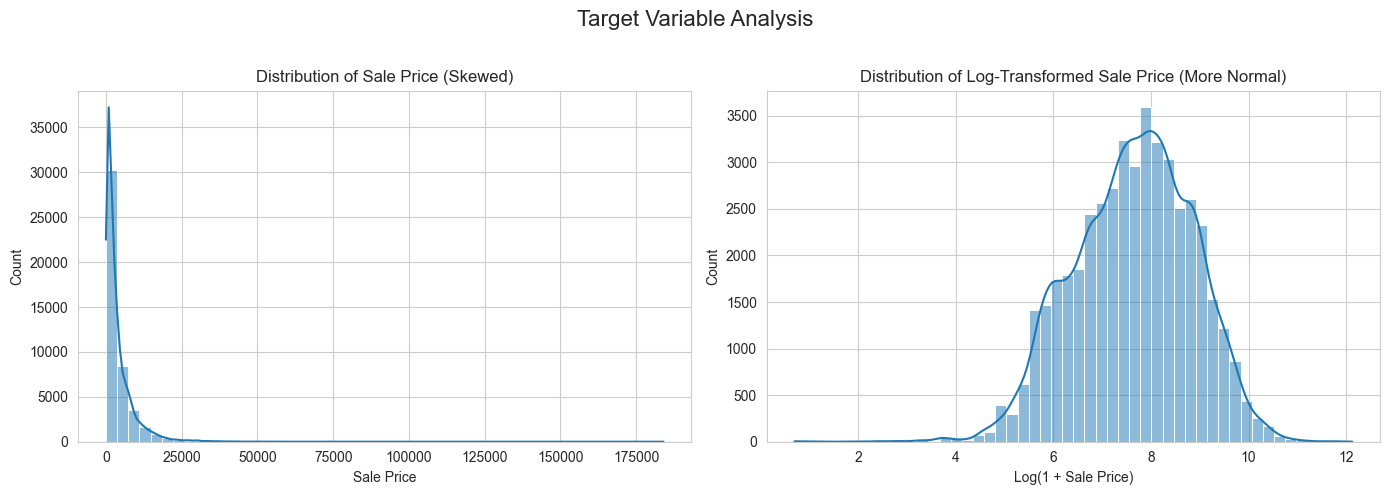

In [24]:
print("\n--- Starting Exploratory Data Analysis (EDA) ---")

# 1.1. Analyze the Target Variable: Sale Price
plt.figure(figsize=(14, 5))

# Plotting the distribution of Sale Price
plt.subplot(1, 2, 1)
sns.histplot(df_processing['Sale Price'], kde=True, bins=50)
plt.title('Distribution of Sale Price (Skewed)')
plt.xlabel('Sale Price')

# Plotting the log-transformed distribution of Sale Price
# We use log1p which is log(1+x) to handle potential zero values gracefully
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df_processing['Sale Price']), kde=True, bins=50)
plt.title('Distribution of Log-Transformed Sale Price (More Normal)')
plt.xlabel('Log(1 + Sale Price)')

plt.suptitle('Target Variable Analysis', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Analyzing relationships between numerical features and Sale Price...


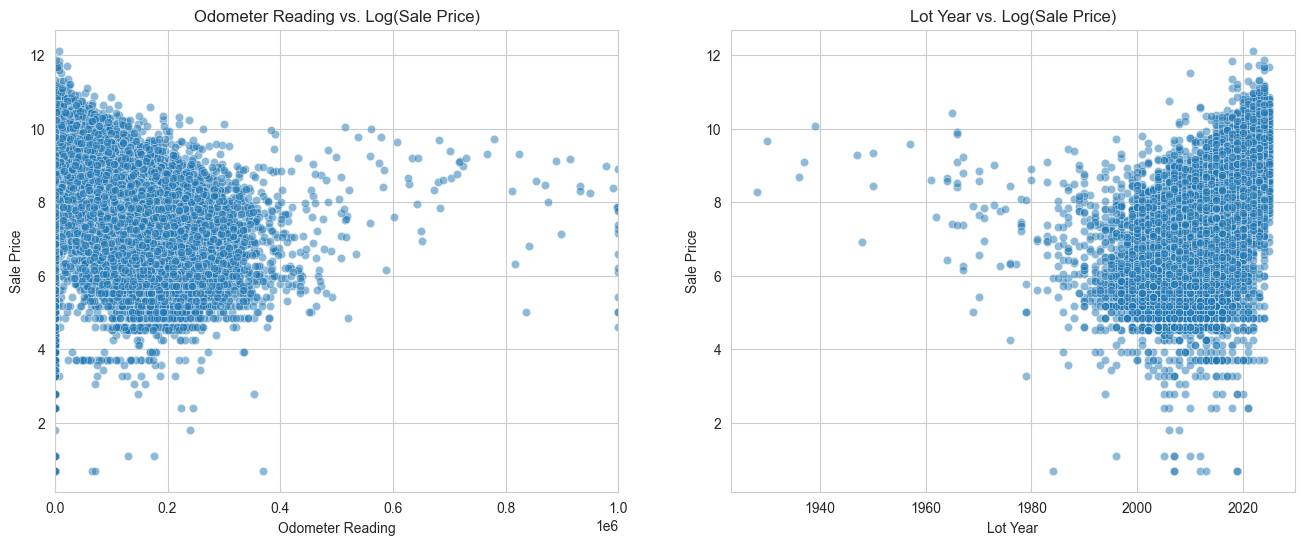

In [25]:
# 1.2. Analyze Numerical Features vs. Sale Price
print("\nAnalyzing relationships between numerical features and Sale Price...")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Odometer Reading vs. Sale Price
# We'll use log-transformed price for better visualization
sns.scatterplot(ax=axes[0], x='Odometer Reading', y=np.log1p(df_processing['Sale Price']), data=df_processing, alpha=0.5)
axes[0].set_title('Odometer Reading vs. Log(Sale Price)')
# The max odometer reading seems like a huge outlier, let's zoom in
axes[0].set_xlim(0, 1000000) 

# Lot Year vs. Sale Price
sns.scatterplot(ax=axes[1], x='Lot Year', y=np.log1p(df_processing['Sale Price']), data=df_processing, alpha=0.5)
axes[1].set_title('Lot Year vs. Log(Sale Price)')

plt.show()


Analyzing relationships between key categorical features and Sale Price...

Cardinality of Categorical Features:
Lot Make                     92
Lot Model                  2481
Lot Run Condition             3
Sale Title Type             203
Damage Type Description      25
Lot Fuel Type                 8
dtype: int64


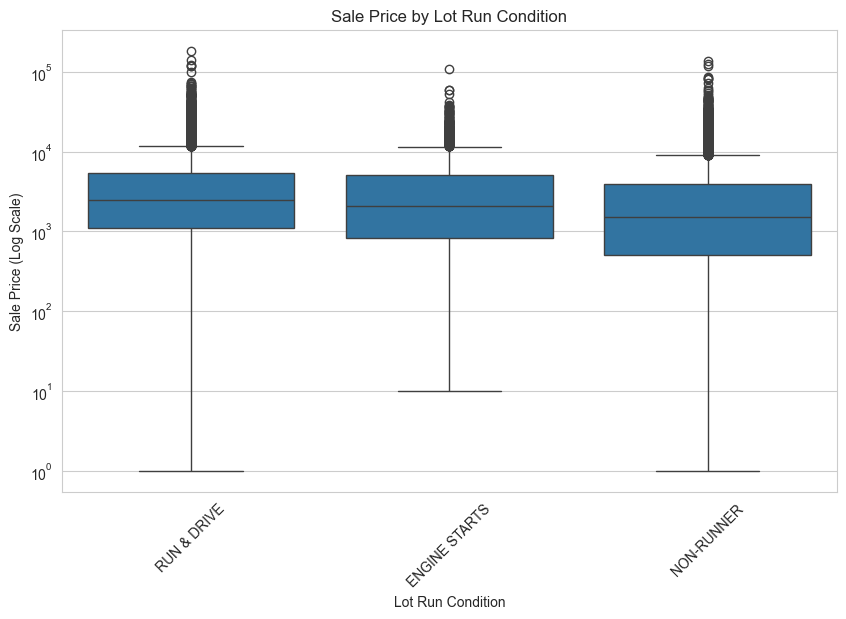

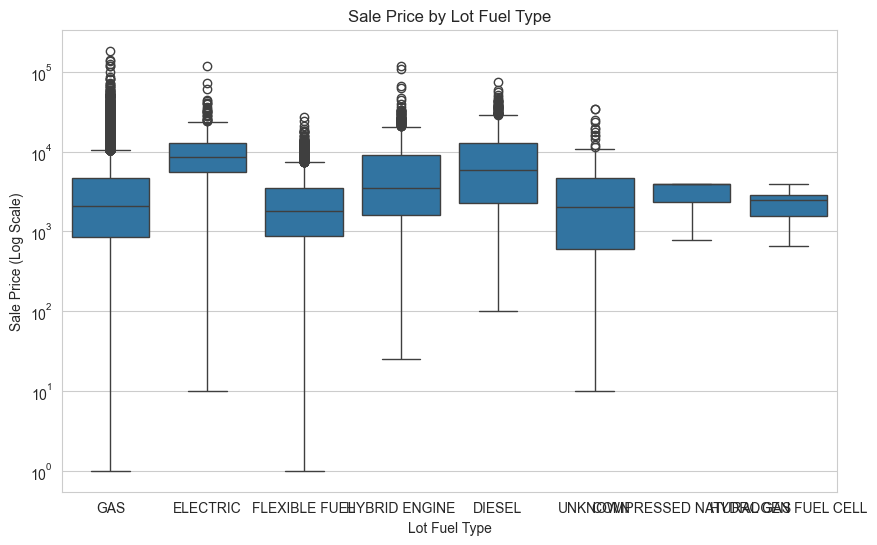

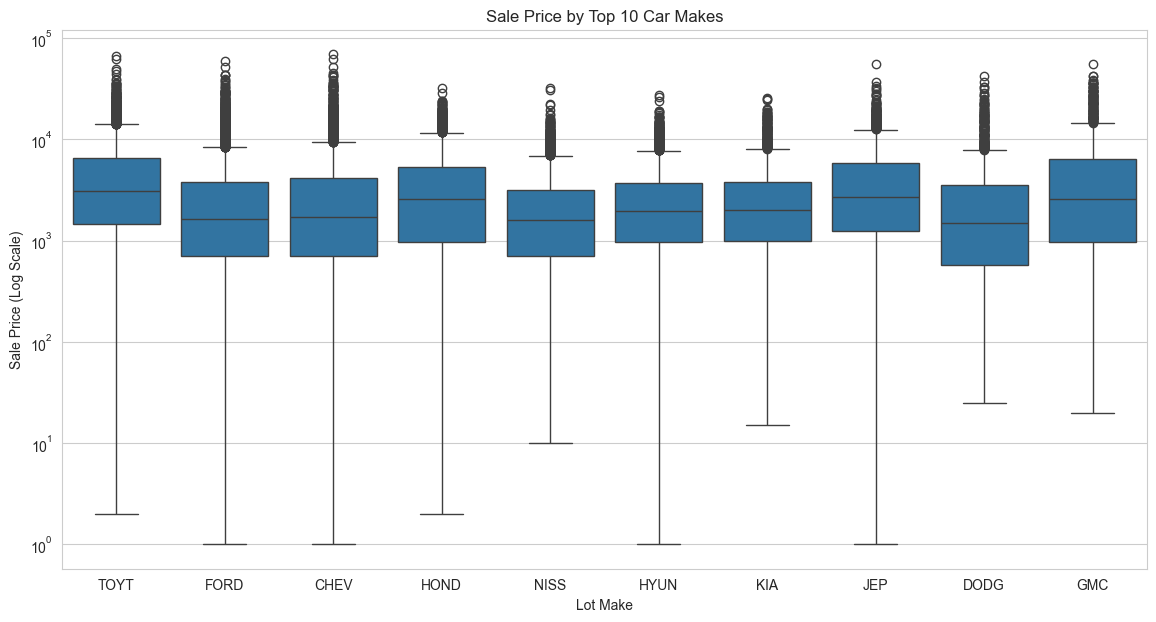

In [26]:
# 1.3. Analyze Categorical Features vs. Sale Price
print("\nAnalyzing relationships between key categorical features and Sale Price...")

# Let's check the number of unique values in categorical columns
print("\nCardinality of Categorical Features:")
print(df_processing.select_dtypes(include=['object']).nunique())

# Boxplot for 'Lot Run Condition' vs. Sale Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Lot Run Condition', y='Sale Price', data=df_processing)
plt.title('Sale Price by Lot Run Condition')
plt.yscale('log') # Use log scale due to price skewness
plt.ylabel('Sale Price (Log Scale)')
plt.xticks(rotation=45)
plt.show()

# Boxplot for 'Lot Fuel Type' vs. Sale Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Lot Fuel Type', y='Sale Price', data=df_processing)
plt.title('Sale Price by Lot Fuel Type')
plt.yscale('log')
plt.ylabel('Sale Price (Log Scale)')
plt.show()

# Boxplot for Top 10 Car Makes vs. Sale Price
top_10_makes = df_processing['Lot Make'].value_counts().nlargest(10).index
df_top_makes = df_processing[df_processing['Lot Make'].isin(top_10_makes)]

plt.figure(figsize=(14, 7))
sns.boxplot(x='Lot Make', y='Sale Price', data=df_top_makes, order=top_10_makes)
plt.title('Sale Price by Top 10 Car Makes')
plt.yscale('log')
plt.ylabel('Sale Price (Log Scale)')
plt.show()

### Data Preprocessing

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

print("\n--- Starting Data Preprocessing Pipeline ---")

# 2.1. Feature Engineering
# Create a more useful 'Vehicle Age' feature from 'Lot Year'
current_year = datetime.now().year
df_processing['Vehicle Age'] = current_year - df_processing['Lot Year']

# Drop the original 'Lot Year' column as 'Vehicle Age' is more informative
df_model_data = df_processing.drop('Lot Year', axis=1)

print("\nCreated 'Vehicle Age' feature and dropped 'Lot Year'.")
df_model_data.head()


--- Starting Data Preprocessing Pipeline ---

Created 'Vehicle Age' feature and dropped 'Lot Year'.


,Lot Make,Lot Model,Sale Price,Lot Run Condition,Sale Title Type,Damage Type Description,Odometer Reading,Lot Fuel Type,Vehicle Age
0,NISS,VERSA S,3800,RUN & DRIVE,CERT OF SALVAGE > 75,ALL OVER ...,12902,GAS ...,1
1,HYUN,ELANTRA N,7400,ENGINE STARTS,CERT OF TITLE-SALVAG,FRONT END ...,34151,GAS ...,3
2,DODG,CHARGER DA,28500,RUN & DRIVE,CERTIFICATE OF TITLE,BURN - ENGINE ...,16,ELECTRIC ...,0
3,FORD,FOCUS SEL,600,NON-RUNNER,BILL OF SALE,FRONT END ...,73286,GAS ...,7
4,TOYT,SIENNA LE,2150,RUN & DRIVE,CERTIFICATE OF SALVA,REAR END ...,165276,GAS ...,12


In [39]:
# 2.2. Define Features (X) and Target (y)
X = df_model_data.drop('Sale Price', axis=1)
y = df_model_data['Sale Price']

# 2.3. Split Data into Training and Testing sets
# This is crucial to prevent data leakage from the test set into the training process
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nData split into training and testing sets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


Data split into training and testing sets:
X_train shape: (36578, 8)
X_test shape: (9145, 8)


In [40]:
# 2.4. Log-transform the target variable (y) due to its skewness
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)
print("\nTarget variable 'Sale Price' has been log-transformed.")


Target variable 'Sale Price' has been log-transformed.


In [49]:
# 2.5. Identify Feature Types based on Cardinality
numeric_features = X.select_dtypes(include=np.number).columns.tolist()

# We will define "high cardinality" as any categorical feature with more than 30 unique values.
# This threshold can be tuned.
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
high_cardinality_cats = [col for col in categorical_features if X_train[col].nunique() > 30]
low_cardinality_cats = [col for col in categorical_features if X_train[col].nunique() <= 30]

print(f"\nIdentified Numerical Features: {numeric_features}")
print(f"Identified Low Cardinality Categorical Features: {low_cardinality_cats}")
print(f"Identified High Cardinality Categorical Features: {high_cardinality_cats}")


Identified Numerical Features: ['Odometer Reading', 'Vehicle Age']
Identified Low Cardinality Categorical Features: ['Lot Run Condition', 'Damage Type Description', 'Lot Fuel Type']
Identified High Cardinality Categorical Features: ['Lot Make', 'Lot Model', 'Sale Title Type']


In [50]:
# 2.6. Handle High Cardinality Features by Grouping Rare Categories
# We will group categories that appear in less than 0.5% of the training data rows.
# This must be learned from the training set ONLY to prevent data leakage.
print("\nGrouping rare categories for high-cardinality features...")

# Create copies to avoid SettingWithCopyWarning
X_train = X_train.copy()
X_test = X_test.copy()

# A threshold for what is considered 'rare'
RARE_THRESHOLD = 0.005 # 0.5%

for col in high_cardinality_cats:
    # Calculate frequency of each category in the training data
    freq_map = (X_train[col].value_counts() / len(X_train))
    
    # Identify categories that are frequent enough
    frequent_cats = freq_map[freq_map > RARE_THRESHOLD].index
    
    print(f"  - Column '{col}': {X_train[col].nunique()} unique values reduced to {len(frequent_cats)} + 'Other'")
    
    # In X_train, replace rare categories with 'Other'
    X_train[col] = np.where(X_train[col].isin(frequent_cats), X_train[col], 'Other')
    
    # In X_test, do the same. Any category not in the 'frequent_cats' list (learned from train)
    # will be replaced by 'Other'. This handles both rare categories and categories that might
    # appear in test but not train.
    X_test[col] = np.where(X_test[col].isin(frequent_cats), X_test[col], 'Other')


Grouping rare categories for high-cardinality features...
  - Column 'Lot Make': 89 unique values reduced to 28 + 'Other'
  - Column 'Lot Model': 2312 unique values reduced to 30 + 'Other'
  - Column 'Sale Title Type': 188 unique values reduced to 23 + 'Other'


In [52]:
# 2.7. Combine preprocessing steps with ColumnTransformer
# This is the master object that applies the correct transformation to each column type

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Keep other columns if any (none in this case)
)

# 2.8. Apply the preprocessing pipeline to the data
# We 'fit' the preprocessor on the training data and 'transform' both train and test data.
# This ensures the scaling and encoding are learned ONLY from the training set.

print("\nFitting the preprocessor on training data and transforming train/test sets...")
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# The output is a NumPy array, ready for modeling. Let's see its new shape.
print(f"Shape of processed training data: {X_train_processed.shape}")
print(f"Shape of processed testing data: {X_test_processed.shape}")

# You can get the new feature names after one-hot encoding if needed
# This helps in interpreting model coefficients for linear models
try:
    processed_feature_names = numeric_features + \
        preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features).tolist()
    print(f"\nTotal number of features after processing: {len(processed_feature_names)}")
    # print("First 10 processed feature names:", processed_feature_names[:10])
except Exception as e:
    print(f"\nCould not get feature names: {e}")

print("\n--- Preprocessing Complete ---")
print("The data (X_train_processed, X_test_processed) and target (y_train_log, y_test_log) are now ready for model training.")


Fitting the preprocessor on training data and transforming train/test sets...
Shape of processed training data: (36578, 123)
Shape of processed testing data: (9145, 123)

Total number of features after processing: 123

--- Preprocessing Complete ---
The data (X_train_processed, X_test_processed) and target (y_train_log, y_test_log) are now ready for model training.


In [55]:
X_train_processed[0]

array([-0.35871002, -0.22105788,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  